<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Вычислите-общую-выручку-за-июль-2021-по-тем-сделкам,-приход-денежных-средств-которых-не-просрочен." data-toc-modified-id="Вычислите-общую-выручку-за-июль-2021-по-тем-сделкам,-приход-денежных-средств-которых-не-просрочен.-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Вычислите общую выручку за июль 2021 по тем сделкам, приход денежных средств которых не просрочен.</a></span></li><li><span><a href="#Как-изменялась-выручка-компании-за-рассматриваемый-период?" data-toc-modified-id="Как-изменялась-выручка-компании-за-рассматриваемый-период?-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Как изменялась выручка компании за рассматриваемый период?</a></span></li><li><span><a href="#Кто-из-менеджеров-привлек-для-компании-больше-всего-денежных-средств-в-сентябре-2021?" data-toc-modified-id="Кто-из-менеджеров-привлек-для-компании-больше-всего-денежных-средств-в-сентябре-2021?-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Кто из менеджеров привлек для компании больше всего денежных средств в сентябре 2021?</a></span></li><li><span><a href="#Какой-тип-сделок-(новая/текущая)-был-преобладающим-в-октябре-2021?" data-toc-modified-id="Какой-тип-сделок-(новая/текущая)-был-преобладающим-в-октябре-2021?-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Какой тип сделок (новая/текущая) был преобладающим в октябре 2021?</a></span></li><li><span><a href="#Сколько-оригиналов-договора-по-майским-сделкам-было-получено-в-июне-2021?" data-toc-modified-id="Сколько-оригиналов-договора-по-майским-сделкам-было-получено-в-июне-2021?-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Сколько оригиналов договора по майским сделкам было получено в июне 2021?</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Выводы</a></span></li><li><span><a href="#Задание" data-toc-modified-id="Задание-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Задание</a></span></li></ul></div>

# Техническое задание
Техническое задание полностью выполняется с помощью языка программирования Python. В таблице Excel НЕЛЬЗЯ вносить какие-либо изменения вручную. В файле «data.xlsx» представлены данные по поступлению денежных средств от клиентов компании N за покупку ее услуг.

Имеющиеся поля:
- client_id - ID клиента;
- sum – сумма денежных средств;
- status – статус оплаты;
- sale – менеджер, заключивший сделку;
- new/current – статус сделки;
- document – наличие оригинала подписанного договора с клиентом;
- receiving_date – дата получения оригинала договора.


In [1]:
from IPython.display import display
import pandas as pd
import datetime 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pip install openpyxl xlsxwriter xlrd 

Note: you may need to restart the kernel to use updated packages.


In [3]:
data = pd.read_excel('data.xlsx')

In [4]:
data.head()

,client_id,sum,status,sale,new/current,Unnamed: 5,document,receiving_date
0,NaN,NaN,Май 2021,NaN,NaN,NaN,NaN,NaN
1,6.0,11693.7,ВНУТРЕННИЙ,-,-,NaN,-,-
2,14.0,5452.7,ОПЛАЧЕНО,Петрова,новая,NaN,оригинал,2021-07-26 00:00:00
3,15.0,13991.7,ОПЛАЧЕНО,Иванов,текущая,NaN,оригинал,2021-06-08 00:00:00
4,16.0,719.7,ОПЛАЧЕНО,Иванов,текущая,NaN,оригинал,2021-06-08 00:00:00


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   client_id       724 non-null    float64
 1   sum             724 non-null    float64
 2   status          730 non-null    object 
 3   sale            724 non-null    object 
 4   new/current     724 non-null    object 
 5   Unnamed: 5      0 non-null      float64
 6   document        709 non-null    object 
 7   receiving_date  607 non-null    object 
dtypes: float64(3), object(5)
memory usage: 45.8+ KB


In [6]:
#2021-07-26 00:00:00
data['receiving_date'] = data['receiving_date'].replace(['NaN', '-'], None)
data['receiving_date'] = pd.to_datetime(data['receiving_date'], format='%Y-%m-%d %H:%M:%S')

In [7]:
data['client_id'] = data['client_id'].fillna(-1)
data['client_id'] = data['client_id'].astype('int')

In [8]:
del data['Unnamed: 5']

In [9]:
data.head()

,client_id,sum,status,sale,new/current,document,receiving_date
0,-1,NaN,Май 2021,NaN,NaN,NaN,NaT
1,6,11693.7,ВНУТРЕННИЙ,-,-,-,NaT
2,14,5452.7,ОПЛАЧЕНО,Петрова,новая,оригинал,2021-07-26
3,15,13991.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08
4,16,719.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08


In [10]:
display(data[data['status'] == 'Май 2021'])
display(data[data['status'] == 'Июнь 2021'])
display(data[data['status'] == 'Июль 2021'])
display(data[data['status'] == 'Август 2021'])
display(data[data['status'] == 'Сентябрь 2021'])
data[data['status'] == 'Октябрь 2021']

,client_id,sum,status,sale,new/current,document,receiving_date
0,-1,NaN,Май 2021,NaN,NaN,NaN,NaT


,client_id,sum,status,sale,new/current,document,receiving_date
129,-1,NaN,Июнь 2021,NaN,NaN,NaN,NaT


,client_id,sum,status,sale,new/current,document,receiving_date
258,-1,NaN,Июль 2021,NaN,NaN,NaN,NaT


,client_id,sum,status,sale,new/current,document,receiving_date
369,-1,NaN,Август 2021,NaN,NaN,NaN,NaT


,client_id,sum,status,sale,new/current,document,receiving_date
484,-1,NaN,Сентябрь 2021,NaN,NaN,NaN,NaT


,client_id,sum,status,sale,new/current,document,receiving_date
594,-1,NaN,Октябрь 2021,NaN,NaN,NaN,NaT


In [11]:
data_may = data.iloc[1:129, :]
data_june = data.iloc[130:258, :]
data_july = data.iloc[259:369, :]
data_august = data.iloc[370:484, :]
data_sept = data.iloc[485:594, :]
data_octb = data.iloc[595:, :]

In [12]:
display(data_may.tail())
display(data_june.tail())
display(data_july.tail())
display(data_august.tail())
display(data_sept.tail())
data_octb.tail()

,client_id,sum,status,sale,new/current,document,receiving_date
124,277,4623.7,ОПЛАЧЕНО,Филимонова,текущая,оригинал,2021-07-14
125,281,4488.7,ОПЛАЧЕНО,Селиванов,новая,оригинал,2021-07-16
126,284,8903.7,ПРОСРОЧЕНО,Филимонова,текущая,оригинал,2021-07-27
127,286,3453.7,ОПЛАЧЕНО,Филимонова,текущая,оригинал,2021-05-31
128,287,6368.7,ОПЛАЧЕНО,Филимонова,текущая,оригинал,2021-06-29


,client_id,sum,status,sale,new/current,document,receiving_date
253,281,5733.7,ОПЛАЧЕНО,Селиванов,текущая,оригинал,2021-07-22
254,282,953.7,ОПЛАЧЕНО,Селиванов,новая,оригинал,2021-07-16
255,284,8823.7,ПРОСРОЧЕНО,Филимонова,текущая,оригинал,2021-09-08
256,286,3453.7,ОПЛАЧЕНО,Филимонова,текущая,оригинал,2021-07-22
257,287,6543.7,ОПЛАЧЕНО,Филимонова,текущая,оригинал,2021-08-12


,client_id,sum,status,sale,new/current,document,receiving_date
364,277,4878.7,ОПЛАЧЕНО,Филимонова,текущая,оригинал,2021-08-03
365,281,11703.7,ОПЛАЧЕНО,Селиванов,текущая,оригинал,2021-08-13
366,284,1977.7,ПРОСРОЧЕНО,Филимонова,текущая,НЕТ,NaT
367,286,4048.7,ОПЛАЧЕНО,Филимонова,текущая,оригинал,2021-08-11
368,287,6473.7,ОПЛАЧЕНО,Филимонова,текущая,оригинал,2021-08-12


,client_id,sum,status,sale,new/current,document,receiving_date
479,303,22413.7,ОПЛАЧЕНО,Андреев,новая,оригинал,2021-09-10
480,304,1783.7,ОПЛАЧЕНО,Андреев,новая,оригинал,2021-09-10
481,285,3423.7,ОПЛАЧЕНО,Васильев,новая,оригинал,2021-09-02
482,286,3678.7,ОПЛАЧЕНО,Филимонова,текущая,оригинал,2021-09-21
483,287,6518.7,ОПЛАЧЕНО,Филимонова,текущая,оригинал,2021-09-07


,client_id,sum,status,sale,new/current,document,receiving_date
589,304,1313.7,ОПЛАЧЕНО,Андреев,текущая,оригинал,2021-10-13
590,285,3453.7,ОПЛАЧЕНО,Васильев,текущая,оригинал,2021-10-05
591,285,4328.7,ОПЛАЧЕНО,Васильев,новая,оригинал,2021-10-05
592,286,4078.7,ОПЛАЧЕНО,Филимонова,текущая,оригинал,2021-10-20
593,287,6488.7,ОПЛАЧЕНО,Филимонова,текущая,оригинал,2021-10-13


,client_id,sum,status,sale,new/current,document,receiving_date
725,285,4328.7,ОПЛАЧЕНО,Васильев,текущая,оригинал,2021-11-15
726,360,3096.2,ОПЛАЧЕНО,Васильев,новая,НЕТ,NaT
727,360,3096.2,ПРОСРОЧЕНО,Васильев,новая,НЕТ,NaT
728,373,4403.7,ОПЛАЧЕНО,Михайлов,новая,оригинал,2021-11-08
729,286,3978.7,ОПЛАЧЕНО,Филимонова,текущая,оригинал,2021-11-15


In [13]:
data_may['month'] = 5
data_june['month'] = 6
data_july['month'] = 7
data_august['month'] = 8
data_sept['month'] = 9
data_octb['month'] = 10

C:\Users\Katerina\AppData\Local\Temp\ipykernel_7280\1398324710.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_may['month'] = 5
C:\Users\Katerina\AppData\Local\Temp\ipykernel_7280\1398324710.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_june['month'] = 6
C:\Users\Katerina\AppData\Local\Temp\ipykernel_7280\1398324710.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

## Вычислите общую выручку за июль 2021 по тем сделкам, приход денежных средств которых не просрочен.

In [14]:
data_july.head(10)

,client_id,sum,status,sale,new/current,document,receiving_date,month
259,15,13838.70,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-08-09,7
260,16,1586.50,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-08-09,7
261,18,2996.70,ОПЛАЧЕНО,Иванов,текущая,НЕТ,NaT,7
262,21,4313.70,ОПЛАЧЕНО,Кузнецова,текущая,оригинал,2021-09-17,7
263,24,19407.70,ОПЛАЧЕНО,Андреев,текущая,оригинал,2021-08-19,7
264,30,3833.70,ОПЛАЧЕНО,Филимонова,текущая,оригинал,2021-08-20,7
265,31,5983.70,ОПЛАЧЕНО,Филимонова,текущая,оригинал,2021-08-20,7
266,32,7117.63,ОПЛАЧЕНО,Филимонова,текущая,оригинал,2021-09-27,7
267,34,3759.77,ОПЛАЧЕНО,Филимонова,текущая,оригинал,2021-09-27,7
268,36,3318.70,ОПЛАЧЕНО,Филимонова,текущая,оригинал,2021-08-04,7


In [15]:
data_july['status'].unique()

array(['ОПЛАЧЕНО', 'ПРОСРОЧЕНО'], dtype=object)

In [16]:
print("Общая выручка за июль 2021 по не просроченным сделкам, составляет:",\
      round(data_july[data_july['status'] == 'ОПЛАЧЕНО']['sum'].sum(), 2))

Общая выручка за июль 2021 по не просроченным сделкам, составляет: 859896.47


**Общая выручка за июль 2021 по не просроченным сделкам, составляет: 859896.47**

## Как изменялась выручка компании за рассматриваемый период? 

In [17]:
data_2 = data_may.copy()
data_2 = pd.concat([data_2, data_june, data_july, data_august, data_sept, data_octb], sort=False, axis=0)
data_2

,client_id,sum,status,sale,new/current,document,receiving_date,month
1,6,11693.7,ВНУТРЕННИЙ,-,-,-,NaT,5
2,14,5452.7,ОПЛАЧЕНО,Петрова,новая,оригинал,2021-07-26,5
3,15,13991.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08,5
4,16,719.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08,5
5,18,4253.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-07-07,5
...,...,...,...,...,...,...,...,...
725,285,4328.7,ОПЛАЧЕНО,Васильев,текущая,оригинал,2021-11-15,10
726,360,3096.2,ОПЛАЧЕНО,Васильев,новая,НЕТ,NaT,10
727,360,3096.2,ПРОСРОЧЕНО,Васильев,новая,НЕТ,NaT,10
728,373,4403.7,ОПЛАЧЕНО,Михайлов,новая,оригинал,2021-11-08,10


In [18]:
month = data_2['month'].unique().tolist()
month

[5, 6, 7, 8, 9, 10]

In [19]:
data_pivot = data_2.pivot_table(index='month', values='sum', aggfunc='sum')
data_pivot

,sum
month,
5,809572.19
6,810266.11
7,861874.17
8,850435.79
9,820383.78
10,1033148.39


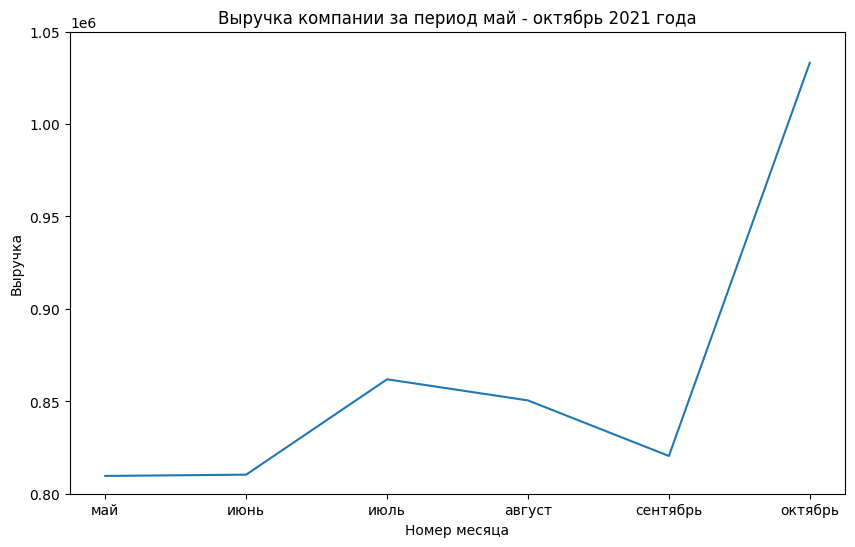

In [20]:
labels=['май', 'июнь', 'июль', 'август', 'сентябрь', 'октябрь']
plt.figure(figsize=(10,6))
ax = sns.lineplot(x = 'month', y = 'sum', data = data_pivot)
ax.set(xlabel = 'Номер месяца', ylabel = 'Выручка', title = 'Выручка компании за период май - октябрь 2021 года', ylim=[800000, 1050000])
plt.xticks([5,6,7,8,9,10],labels)
plt.show()

**Как показано на графике, меньше всего выручки была в Мае, и больше всего в октябре**

## Кто из менеджеров привлек для компании больше всего денежных средств в сентябре 2021?


In [21]:
data_sept.head()

,client_id,sum,status,sale,new/current,document,receiving_date,month
485,15,14288.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-10-08,9
486,16,1494.0,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-10-08,9
487,21,893.7,ОПЛАЧЕНО,Кузнецова,текущая,оригинал,2021-10-20,9
488,24,18142.7,ОПЛАЧЕНО,Андреев,текущая,NaN,2021-10-15,9
489,30,3833.7,В РАБОТЕ,Филимонова,текущая,NaN,NaT,9


In [22]:
data_sept.pivot_table(index='sale', values='sum', aggfunc='sum').sort_values('sum', ascending=False)

,sum
sale,
Смирнов,221525.70
Петрова,149344.46
Андреев,133652.50
Иванов,94770.60
Кузнецова,72228.40
Филимонова,59514.47
Васильев,49895.45
Соколов,35183.50
Михайлов,4268.70


**Больше всего денежных средств привлек для компании менеджер Смирнов**

## Какой тип сделок (новая/текущая) был преобладающим в октябре 2021? 


In [23]:
data_octb.head()

,client_id,sum,status,sale,new/current,document,receiving_date,month
595,15,14591.7,В РАБОТЕ,Иванов,текущая,оригинал,2021-11-11,10
596,16,1291.7,В РАБОТЕ,Иванов,текущая,оригинал,2021-11-11,10
597,379,6063.7,В РАБОТЕ,Иванов,новая,оригинал,2021-11-11,10
598,24,18592.7,ОПЛАЧЕНО,Андреев,текущая,оригинал,2021-11-12,10
599,24,1453.7,ОПЛАЧЕНО,Андреев,текущая,оригинал,2021-11-12,10


In [24]:
data_octb['new/current'].value_counts()

текущая    99
новая      36
Name: new/current, dtype: int64

**Сделок типа "текущая" преобладает в сентябре 2021 года**

## Сколько оригиналов договора по майским сделкам было получено в июне 2021?


In [25]:
data_may.head()

,client_id,sum,status,sale,new/current,document,receiving_date,month
1,6,11693.7,ВНУТРЕННИЙ,-,-,-,NaT,5
2,14,5452.7,ОПЛАЧЕНО,Петрова,новая,оригинал,2021-07-26,5
3,15,13991.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08,5
4,16,719.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08,5
5,18,4253.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-07-07,5


In [26]:
data_may['receiving_date'] = data_may['receiving_date'].fillna(datetime.datetime(2020, 1, 1))
data_may['month_deal'] = data_may['receiving_date'].dt.month
data_may['month_deal'] = data_may['month_deal'].astype('int')

C:\Users\Katerina\AppData\Local\Temp\ipykernel_7280\4052733437.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_may['receiving_date'] = data_may['receiving_date'].fillna(datetime.datetime(2020, 1, 1))
C:\Users\Katerina\AppData\Local\Temp\ipykernel_7280\4052733437.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_may['month_deal'] = data_may['receiving_date'].dt.month
C:\Users\Katerina\AppData\Local\Temp\ipykernel_7280\4052733437.py:3: SettingWithCopyWarning: 
A value is trying to be set on a 

In [27]:
data_june.head()

,client_id,sum,status,sale,new/current,document,receiving_date,month
130,316,35653.7,ОПЛАЧЕНО,Петрова,новая,оригинал,2021-08-09,6
131,15,13518.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-07-09,6
132,16,985.3,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-07-09,6
133,18,2996.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-09-09,6
134,21,4233.7,ОПЛАЧЕНО,Кузнецова,текущая,оригинал,2021-09-17,6


In [28]:
data_may[(data_may['document'] == 'оригинал') & (data_may['month_deal'] == 6)]['client_id'].count()

76

**76 оригиналов договора по майсикм сделкам было получено в июне**

## Выводы
1. Общая выручка за июль 2021 по не просроченным сделкам, составляет: 859896.47
2. График представлен выше: выручка в мае самая низкая, выручка в октябре самая высокая
3. Больше всего денежных средств привлек для компании менеджер Смирнов
4. Сделок типа "текущая" преобладает в сентябре 2021 года
5. 76 оригиналов договора по майсикм сделкам было получено в июне

## Задание

In [29]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 724 entries, 1 to 729
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   client_id       724 non-null    int32         
 1   sum             724 non-null    float64       
 2   status          724 non-null    object        
 3   sale            724 non-null    object        
 4   new/current     724 non-null    object        
 5   document        709 non-null    object        
 6   receiving_date  606 non-null    datetime64[ns]
 7   month           724 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(4)
memory usage: 48.1+ KB


In [30]:
data_2['receiving_date'] = data_2['receiving_date'].fillna(datetime.datetime(2020, 1, 1))
data_2['month_deal'] = data_2['receiving_date'].dt.month
data_2['month_deal'] = data_2['month_deal'].astype('int')
data_2

,client_id,sum,status,sale,new/current,document,receiving_date,month,month_deal
1,6,11693.7,ВНУТРЕННИЙ,-,-,-,2020-01-01,5,1
2,14,5452.7,ОПЛАЧЕНО,Петрова,новая,оригинал,2021-07-26,5,7
3,15,13991.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08,5,6
4,16,719.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08,5,6
5,18,4253.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-07-07,5,7
...,...,...,...,...,...,...,...,...,...
725,285,4328.7,ОПЛАЧЕНО,Васильев,текущая,оригинал,2021-11-15,10,11
726,360,3096.2,ОПЛАЧЕНО,Васильев,новая,НЕТ,2020-01-01,10,1
727,360,3096.2,ПРОСРОЧЕНО,Васильев,новая,НЕТ,2020-01-01,10,1
728,373,4403.7,ОПЛАЧЕНО,Михайлов,новая,оригинал,2021-11-08,10,11


1) За новые сделки менеджер получает 7 % от суммы, при условии, что статус оплаты «ОПЛАЧЕНО», а также имеется оригинал подписанного договора с клиентом (в рассматриваемом месяце).

2) За текущие сделки менеджер получает 5 % от суммы, если она больше 10 тыс., и 3 % от суммы, если меньше. При этом статус оплаты может быть любым, кроме «ПРОСРОЧЕНО», а также необходимо наличие оригинала подписанного договора с клиентом (в рассматриваемом месяце). 


In [41]:
data_2['status'].unique()

array(['ВНУТРЕННИЙ', 'ОПЛАЧЕНО', 'ПРОСРОЧЕНО', 'В РАБОТЕ',
       'НА ПОДПИСАНИИ'], dtype=object)

In [47]:
def bonus_manager(data):
    val = 0
    if (data['month'] == data['month_deal'] and data['document'] == 'оригинал'):
        if data['new/current'] == 'новая':
            if data['status'] == 'ОПЛАЧЕНО':
                val =  data['sum'] * 0.07
        if data['new/current'] == 'текущая':
            if (data['status'] == 'ОПЛАЧЕНО' or data['status'] == 'В РАБОТЕ'):
                if data['sum'] >= 10000:
                    val = data['sum'] * 0.05
                if data['sum'] < 10000:
                    val = data['sum'] * 0.03
    return val

In [48]:
data_2['bonus'] = data_2.apply(bonus_manager, axis=1)
data_2

,client_id,sum,status,sale,new/current,document,receiving_date,month,month_deal,bonus
1,6,11693.7,ВНУТРЕННИЙ,-,-,-,2020-01-01,5,1,0.0
2,14,5452.7,ОПЛАЧЕНО,Петрова,новая,оригинал,2021-07-26,5,7,0.0
3,15,13991.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08,5,6,0.0
4,16,719.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08,5,6,0.0
5,18,4253.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-07-07,5,7,0.0
...,...,...,...,...,...,...,...,...,...,...
725,285,4328.7,ОПЛАЧЕНО,Васильев,текущая,оригинал,2021-11-15,10,11,0.0
726,360,3096.2,ОПЛАЧЕНО,Васильев,новая,НЕТ,2020-01-01,10,1,0.0
727,360,3096.2,ПРОСРОЧЕНО,Васильев,новая,НЕТ,2020-01-01,10,1,0.0
728,373,4403.7,ОПЛАЧЕНО,Михайлов,новая,оригинал,2021-11-08,10,11,0.0


In [49]:
data_2[data_2['month'] == data_2['month_deal']]

,client_id,sum,status,sale,new/current,document,receiving_date,month,month_deal,bonus
50,94,31094.2,ОПЛАЧЕНО,Андреев,текущая,оригинал,2021-05-18,5,5,1554.710
51,95,4688.7,ОПЛАЧЕНО,Андреев,текущая,оригинал,2021-05-18,5,5,140.661
127,286,3453.7,ОПЛАЧЕНО,Филимонова,текущая,оригинал,2021-05-31,5,5,103.611
